In [1]:
from urllib.parse import quote_plus as quote

import ssl
import pymongo

url = 'mongodb://{user}:{pw}@{hosts}/?replicaSet={rs}&authSource={auth_src}'.format(
    user=quote('user1'),
    pw=quote('<password>'),
    hosts=','.join([
        'rc1c-gjislhl9w67h3e2s.mdb.yandexcloud.net:27018'
    ]),
    rs='rs01',
    auth_src='db1')
dbs = pymongo.MongoClient(
    url,
    ssl_ca_certs='/usr/local/share/ca-certificates/Yandex/YandexInternalRootCA.crt',
    ssl_cert_reqs=ssl.CERT_REQUIRED)['db1']

In [2]:
col = dbs['test']

In [15]:
for document in col.find():
    print (document)

{'_id': ObjectId('5c3bae51b25a9b044ef3ea6e'), 'address': 'Highway 37', 'name': 'John'}
{'_id': ObjectId('5c3bb014b25a9b044ef3ea6f'), 'series': [1, 2, 3, 4, 5]}


In [4]:
import numpy as np 
from matplotlib import pyplot as plt
import collections

In [5]:
def deriviation_step(initial_state, derivative, dt):
    """
    Compute one evaluation step
    """
    
    # evaluation of state
    state = {}
    
    if not derivative:
        state["x"] = initial_state["x"] 
        state["y"] = initial_state["y"] 
        state["z"] = initial_state["z"] 
    else:
        state["x"] = initial_state["x"] + derivative["dx"] * dt
        state["y"] = initial_state["y"] + derivative["dy"] * dt
        state["z"] = initial_state["z"] + derivative["dz"] * dt
        
    # evaluation of derivative
    derivative_next_step = {}
    
    derivative_next_step["dx"] = sigma * (state["y"] - state["x"])
    derivative_next_step["dy"] = rho * state["x"] - state["y"] - state["x"] * state["z"]
    derivative_next_step["dz"] = state["x"] * state["y"] - beta * state["z"]
    
    return derivative_next_step
    
def RK_integration(state, dt):
    """
    Runge-Kutta integration of the 4th order at a time `t` with a state `state` 
    with the step `dt`
    """
    
    # Prepare 1,2,3,4 - order derivatives for the final "best" derivative,
    # gained as 4 first elements of the Taylor's approximation
    
    # Random initialization of defivatives(probably will have to moove)
    derivative = dict({"dx": np.random.normal(),
                       "dy": np.random.normal(),
                       "dz": np.random.normal()})
    rk1 = deriviation_step(initial_state=state,
                           derivative=None,
                           dt=dt*0)
    
    rk2 = deriviation_step(initial_state=state, 
                           derivative=rk1,
                           dt=dt*0.5
                           )
    
    rk3 = deriviation_step(initial_state=state, 
                           derivative=rk2,
                           dt=dt*0.5)
    
    rk4 = deriviation_step(initial_state=state,
                           derivative=rk3,
                           dt=dt)
    
    # When all derivatives are ready, it's time to construct Rung-Kutta derivative
    # !!!! DOUBLE CHECK THE TAYLOR'S APPROXIMATIONS !!!!
    dxdt = (1 / 6) * (rk1["dx"] + 2* rk2["dx"] + 2 * rk3["dx"] + rk4["dx"])
    dydt = (1 / 6) * (rk1["dy"] + 2* rk2["dy"] + 2 * rk3["dy"] + rk4["dy"])
    dzdt = (1 / 6) * (rk1["dz"] + 2* rk2["dz"] + 2 * rk3["dz"] + rk4["dz"])
    
    state["x"] = state["x"] + dxdt * dt
    state["y"] = state["y"] + dydt * dt
    state["z"] = state["z"] + dzdt * dt
    return state

In [6]:
beta = 8 / 3
rho = 28
sigma = 10

initial_state = dict({"x": 0.62225717 ,
                   "y": -0.08232857 ,
                   "z": 30.60845379})

ode_solutions = []
for iteration in range(0, int(1e6)):
    state_t = RK_integration(initial_state, dt=0.1)
    ode_solutions.append(list(state_t.values()))
result = np.array(ode_solutions)

In [7]:
series_28 = result[:, 0]

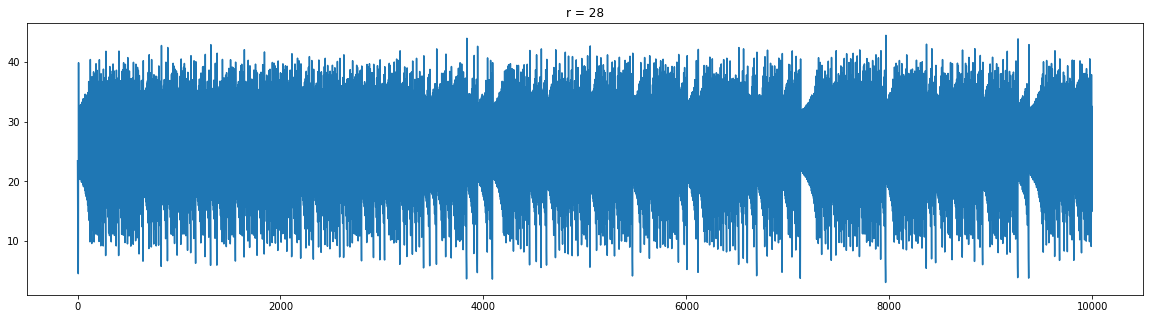

In [8]:
fig, (ax1) = plt.subplots(nrows=1)
fig.set_size_inches(20,5);
ax1.plot(series_28[:10000]);
ax1.set_title("r = 28");

In [9]:
col_lorenz = dbs['lorenz28']

In [12]:
series_dict = {'series': list(series_28)}

In [13]:
col_lorenz.insert_one(series_dict)